In [7]:
#import the useful modules and optimizers
import qiskit
import networkx as nx
import numpy as np
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit_optimization import QuadraticProgram
from qiskit.algorithms.optimizers import ADAM, SLSQP, COBYLA, NELDER_MEAD
from qiskit_optimization.algorithms import MinimumEigenOptimizer

## Homework
### To test your understanding of QAOA, answer the below questions

#### What requirements should the cost function satisfy, so that it can be expressed in terms of Hamiltonian?

#### What is the fundamental theorem behind QAOA? How is it utilized?

#### What is the role of parameters $\gamma$ and $\beta$?

#### Given we have more than one layer in our variational circuit. Would you expect $\gamma$s to increase or decrease? What about $\beta$s?

#### Now try to solve a complexer version of MAXCUT problem with 10 vertices.

In [8]:
#You don't need to change this part
def quadratic_program_from_graph(graph: nx.Graph) -> QuadraticProgram:
    '''Constructs a QuadraticProblem from a given graph for a MAXCUT instance.
    Args:
        graph: Underlying graph of the problem
    Returns: 
        QuadraticProblem
    '''
    # get weight matrix from the graph
    weight_matrix = nx.adjacency_matrix(graph)
    shape = weight_matrix.shape
    size = shape[0]
    # build QUBO matrix Q from weight matrix
    qubo_matrix = np.zeros((size, size))
    qubo_vector = np.zeros(size)
    for i in range(size):
        for j in range(size):
            qubo_matrix[i,j] -= weight_matrix[i, j]
            qubo_vector[i] += weight_matrix[i,j]
    # define the quadraric program
    quadratic_program = QuadraticProgram('maxcut')
    for i in range(size):
        var_name = 'x_{}'.format(i)
        quadratic_program.binary_var(var_name)
    quadratic_program.maximize(quadratic=qubo_matrix, linear=qubo_vector, constant=0)
    #print(quadratic_program.export_as_lp_string())
    return quadratic_program

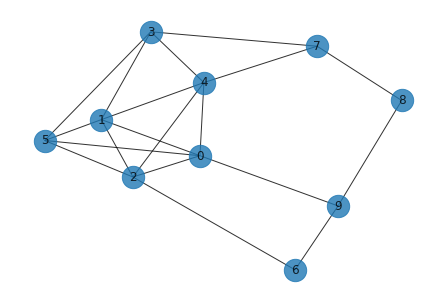

In [9]:
#You don't need to change this part
graph = nx.Graph()
graph.add_nodes_from(np.arange(0,10,1))
edges = [(0,1,2.0), (0,2,3.0), (0,4,4.0), (0,5,1.0), (1,2,4.0), (1,3,1.0), (1,4,1.0), (1,5,3.0), (2,4,2.0), (2,5,3.0), (3,4,5.0), (3,5,1.0),
         (6,2,1.0), (7,4, 3.0), (8,7, 4.0), (9,0, 2.0), (9,6,5.0), (7,3,1.0), (8,9,2.0)]
graph.add_weighted_edges_from(edges)

nx.draw(graph, with_labels=True, alpha=0.8, node_size=500)

You are given a weighted graph like in the problem discussed in the class. Fill in the missing lines of code to find an optimial CUT for this graph. Try out different optimizers, included in the import section. Which of the five optimizers performs the best? Does increasing the number of layers (reps) improve the solution?

Try out different starting points.

In [10]:
backend = Aer.get_backend('qasm_simulator')
backend.shots = 1024
qp = quadratic_program_from_graph(graph)

#START YOUR CODE HERE

# print(result)
#END YOUR CODE HERE


/var/folders/gx/4dklz62x3f9075mzt97mthc40000gn/T/ipykernel_24551/1869177957.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  weight_matrix = nx.adjacency_matrix(graph)
